<a href="https://colab.research.google.com/github/harikavemula91/harikavemula91/blob/main/P2_ML_To_Mail_or_Not_to_Mail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import math
from sklearn.model_selection import train_test_split,KFold 
import numpy as np

In [ ]:
datafile_train=r'carvan_train.csv'
datafile_test=r'carvan_test.csv'
carvan_train=pd.read_csv(datafile_train)
carvan_test=pd.read_csv(datafile_test)

In [ ]:
carvan_train.dtypes

V1     int64
V2     int64
V3     int64
V4     int64
V5     int64
       ...  
V82    int64
V83    int64
V84    int64
V85    int64
V86    int64
Length: 86, dtype: object

In [ ]:
carvan_test.dtypes

V1     int64
V2     int64
V3     int64
V4     int64
V5     int64
       ...  
V81    int64
V82    int64
V83    int64
V84    int64
V85    int64
Length: 85, dtype: object

In [ ]:
carvan_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,...,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
0,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,...,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,...,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,...,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
carvan_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,...,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.00000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,0.883545,2.290450,1.887667,3.230333,4.300240,1.461010,3.351254,4.572484,1.895053,0.397973,0.522329,2.899004,2.219856,2.306424,1.620749,1.606836,2.202508,3.758674,1.067331,4.236860,4.771728,6.040364,1.316386,1.959464,6.277053,2.728959,2.573686,3.536070,2.731364,0.796118,...,2.970457,0.048265,0.175369,0.009447,0.020955,0.092580,0.013054,0.215046,0.194778,0.013741,0.015287,0.023531,1.827722,0.000859,0.018894,0.025249,0.01563,0.047578,0.402954,0.014772,0.020611,0.562178,0.010477,0.041051,0.002233,0.012539,0.033665,0.006183,0.070423,0.076606,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,0.965924,1.722645,1.799928,1.619973,2.005283,1.622967,1.761052,2.298125,1.798321,0.775073,1.056926,1.839675,1.730840,1.692843,1.722882,1.330664,1.529319,1.935568,1.303175,3.089302,3.089837,1.552799,1.203072,1.599714,1.978675,1.981893,2.086099,1.882656,1.927738,1.162829,...,2.920669,0.531346,0.897222,0.244675,0.212738,0.603076,0.228906,0.813133,0.898100,0.209260,0.192471,0.375274,1.879290,0.043462,0.273028,0.156894,0.20456,0.409016,0.492631,0.134133,0.142092,0.604767,0.129991,0.228974,0.062819,0.125775,0.240755,0.124189,0.265112,0.377569,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,2.000000,2.000000,5.000000,0.000000,1.000000,5.000000,1.000000,1.000000,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0

In [ ]:
carvan_train.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,...,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
V1,1.000000,-0.038721,-0.021997,0.009454,0.992672,-0.193613,0.090399,-0.025642,-0.019505,-0.065596,-0.016270,0.086939,0.029240,-0.066250,0.023408,-0.473606,-0.278429,0.525678,-0.418615,-0.117736,0.248598,-0.206198,0.304749,0.273051,-0.392931,-0.188518,-0.038078,0.386104,0.204630,0.148998,-0.149988,-0.177830,0.037795,0.155497,0.351784,-0.352164,0.201531,0.161055,-0.255483,-0.188590,...,-0.008459,-0.027940,-0.003587,0.018422,0.031749,0.096665,0.032408,0.024879,-0.043140,0.028420,-0.015115,0.001364,-0.009755,0.014379,-0.018116,-0.012124,-0.017327,-0.059084,-0.032937,-0.004066,0.079674,-0.008274,-0.027822,-0.012530,0.018883,0.030461,0.092055,0.020123,0.032137,-0.028829,0.021707,-0.012060,-0.002909,-0.011512,0.007801,-0.018162,-0.015774,-0.021087,-0.053718,-0.069385
V2,-0.038721,1.000000,0.010102,0.056975,-0.045817,-0.006136,-0.024360,0.012056,0.020540,0.023025,-0.038566,-0.012544,0.032535,-0.082919,0.042143,0.003419,-0.053171,0.036529,-0.005747,0.042438,-0.018175,0.005762,0.024802,-0.052345,-0.014437,0.009924,-0.025303,-0.007345,0.020671,-0.049127,0.048361,-0.011175,0.023661,-0.011086,-0.016135,0.015282,0.014721,-0.024334,0.015371,0.001929,...,-0.026229,-0.019982,-0.016483,-0.010525,-0.010934,-0.030618,-0.008149,-0.013790,0.019118,0.008396,0.011338,-0.017093,-0.001363,-0.005387,0.004391,-0.016890,0.008141,-0.003767,0.042531,0.004693,-0.027627,-0.029427,-0.018716,-0.019295,-0.009690,-0.010349,-0.027570,-0.006756,-0.013336,0.020926,0.003321,0.009444,-0.016333,0.000655,-0.006189,0.000666,-0.020993,0.018304,-0.004166,-0.009809
V3,-0.021997,0.010102,1.000000,-0.328257,0.016115,0.013105,0.049356,-0.108650,-0.005527,0.534798,-0.175586,-0.500735,-0.659553,-0.315960,0.794014,0.008053,0.039627,-0.038847,0.023796,0.035698,0.106960,-0.004949,0.037590,-0.161246,0.063097,0.011570,0.058552,-0.019022,-0.186612,-0.339429,0.338389,0.251917,0.200070,-0.401747,-0.073419,0.073875,-0.369531,0.044185,0.256645,0.104698,...,0.021131,-0.003170,0.021561,-0.000297,0.012459,0.058832,0.031747,0.023041,0.025971,0.003841,0.016483,0.017390,0.055998,0.008037,0.001857,0.030798,0.013003,0.034550,-0.043920,0.035062,0.036039,0.020598,-0.009047,0.013076,0.000608,0.014608,0.058681,0.027257,0.018615,0.017428,-0.000128,0.016760,0.018749,-0.009269,0.009234,0.000644,0.030330,0.025907,0.028384,0.035573
V4,0.009454,0.056975,-0.328257,1.000000,0.003872,-0.037519,0.093654,0.057737,-0.119966,-0.040384,-0.307401,0.199774,0.236594,0.204225,-0.355754,-0.025792,-0.221676,0.178965,0.141389,0.058309,0.090716,-0.162686,-0.048103,0.034338,0.047820,-0.155802,-0.040360,-0.063555,0.244597,0.025264,-0.023182,-0.132548,-0.088501,0.197608,-0.122024,0.124200,0.175729,-0.053955,-0.148970,0.027676,...,-0.015417,0.018838,-0.017172,-0.009928,0.012955,-0.000447,0.003377,-0.003899,-0.029134,0.019855,-0.006816,-0.001573,0.019326,0.000213,-0.004663,0.019205,-0.013612,-0.019373,-0.014320,-0.008249,0.007497,-0.015807,0.021958,-0.015571,-0.013046,0.006102,-0.005504,0.005630,0.000471,-0.025187,0.021070,-0.001747,0.000644,0.024417,0.000244,-0.001791,0.020612,-0.020042,-0.014540,0.004491
V5,0.992672,-0.045817,0.016115,0.003872,1.000000,-0.199186,0.098493,-0.034566,-0.021466,-0.026619,-0.037509,0.052671,-0.003443,-0.075000,0.058619,-0.471620,-0.279497,0.524062,-0.412656,-0.115330,0.276882,-0.219405,0.305282,0.258888,-0.382017,-0.192616,-0.029731,0.379437,0.192136,0.118160,-0.119223,-0.166208,0.063180,0.125238,0.339905,-0.340296,0.179276,0.163495,-0.241230,-0.179331,...,-0.005723,-0.027093,-0.003476,0.021248,0.035509,0.109887,0.036570,0.029836,-0.040328,0.030780,-0.013076,0.001445,-0.000322,0.015402,-0.020505,-0.014841,-0.017168,-0.057235,-0.041614,-0.000686,0.089791,-0.005573,-0.028770,-0.011791,0.

In [ ]:
import seaborn as sns
%matplotlib inline

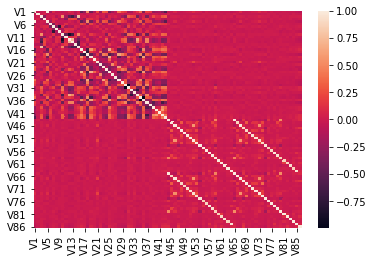

In [ ]:
sns.heatmap(carvan_train.corr())

In [ ]:
carvan_train.isnull().sum()

V1     0
V2     0
V3     0
V4     0
V5     0
      ..
V82    0
V83    0
V84    0
V85    0
V86    0
Length: 86, dtype: int64

In [ ]:
for col in carvan_train.select_dtypes(['int64']).columns:
    print(col,':',carvan_train[col].nunique())

for col in carvan_test.select_dtypes(['int64']).columns:
    print(col,':',carvan_test[col].nunique())

V1 : 40
V2 : 9
V3 : 5
V4 : 6
V5 : 10
V6 : 10
V7 : 10
V8 : 6
V9 : 10
V10 : 10
V11 : 8
V12 : 10
V13 : 10
V14 : 10
V15 : 10
V16 : 10
V17 : 10
V18 : 10
V19 : 10
V20 : 6
V21 : 10
V22 : 10
V23 : 10
V24 : 10
V25 : 10
V26 : 10
V27 : 10
V28 : 10
V29 : 9
V30 : 10
V31 : 10
V32 : 10
V33 : 8
V34 : 10
V35 : 10
V36 : 10
V37 : 10
V38 : 10
V39 : 10
V40 : 10
V41 : 8
V42 : 10
V43 : 8
V44 : 4
V45 : 7
V46 : 4
V47 : 6
V48 : 4
V49 : 6
V50 : 4
V51 : 6
V52 : 5
V53 : 5
V54 : 6
V55 : 10
V56 : 7
V57 : 3
V58 : 5
V59 : 9
V60 : 3
V61 : 7
V62 : 2
V63 : 7
V64 : 5
V65 : 3
V66 : 3
V67 : 2
V68 : 7
V69 : 5
V70 : 4
V71 : 4
V72 : 4
V73 : 5
V74 : 5
V75 : 3
V76 : 6
V77 : 2
V78 : 2
V79 : 3
V80 : 7
V81 : 2
V82 : 3
V83 : 4
V84 : 3
V85 : 3
V86 : 2
V1 : 40
V2 : 9
V3 : 6
V4 : 6
V5 : 10
V6 : 9
V7 : 10
V8 : 6
V9 : 10
V10 : 10
V11 : 8
V12 : 10
V13 : 10
V14 : 10
V15 : 10
V16 : 10
V17 : 10
V18 : 10
V19 : 10
V20 : 6
V21 : 9
V22 : 10
V23 : 10
V24 : 10
V25 : 10
V26 : 10
V27 : 10
V28 : 10
V29 : 9
V30 : 10
V31 : 10
V32 : 10
V33 : 9
V34 : 10


In [ ]:
for col in carvan_train.select_dtypes(['int64']).columns:
    if (carvan_train[col].nunique() > 1):
      print(col,':',carvan_train[col].nunique())

V1 : 40
V2 : 9
V3 : 5
V4 : 6
V5 : 10
V6 : 10
V7 : 10
V8 : 6
V9 : 10
V10 : 10
V11 : 8
V12 : 10
V13 : 10
V14 : 10
V15 : 10
V16 : 10
V17 : 10
V18 : 10
V19 : 10
V20 : 6
V21 : 10
V22 : 10
V23 : 10
V24 : 10
V25 : 10
V26 : 10
V27 : 10
V28 : 10
V29 : 9
V30 : 10
V31 : 10
V32 : 10
V33 : 8
V34 : 10
V35 : 10
V36 : 10
V37 : 10
V38 : 10
V39 : 10
V40 : 10
V41 : 8
V42 : 10
V43 : 8
V44 : 4
V45 : 7
V46 : 4
V47 : 6
V48 : 4
V49 : 6
V50 : 4
V51 : 6
V52 : 5
V53 : 5
V54 : 6
V55 : 10
V56 : 7
V57 : 3
V58 : 5
V59 : 9
V60 : 3
V61 : 7
V62 : 2
V63 : 7
V64 : 5
V65 : 3
V66 : 3
V67 : 2
V68 : 7
V69 : 5
V70 : 4
V71 : 4
V72 : 4
V73 : 5
V74 : 5
V75 : 3
V76 : 6
V77 : 2
V78 : 2
V79 : 3
V80 : 7
V81 : 2
V82 : 3
V83 : 4
V84 : 3
V85 : 3
V86 : 2


In [ ]:
for col in carvan_train.select_dtypes(['int64']).columns & carvan_test.select_dtypes(['int64']).columns:
    if (carvan_train[col].nunique() == carvan_test[col].nunique()):
      print(col,':',carvan_train[col].nunique())

V1 : 40
V2 : 9
V4 : 6
V5 : 10
V7 : 10
V8 : 6
V9 : 10
V10 : 10
V11 : 8
V12 : 10
V13 : 10
V14 : 10
V15 : 10
V16 : 10
V17 : 10
V18 : 10
V19 : 10
V20 : 6
V22 : 10
V23 : 10
V24 : 10
V25 : 10
V26 : 10
V27 : 10
V28 : 10
V29 : 9
V30 : 10
V31 : 10
V32 : 10
V34 : 10
V35 : 10
V36 : 10
V37 : 10
V38 : 10
V39 : 10
V40 : 10
V42 : 10
V43 : 8
V44 : 4
V45 : 7
V48 : 4
V54 : 6
V57 : 3
V59 : 9
V60 : 3
V62 : 2
V64 : 5
V65 : 3
V67 : 2
V68 : 7
V70 : 4
V71 : 4
V76 : 6
V77 : 2
V78 : 2
V81 : 2
V82 : 3
V83 : 4


In [ ]:
#to equalize number of columns in train and test data

for col in ['V1','V2','V4','V5','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17',
'V18','V19','V20','V22','V23','V24','V25','V26','V27','V28','V29','V30','V31','V32','V34','V35',
'V36','V37','V38','V39','V40','V42','V43','V44','V45','V48','V54','V57','V59','V60','V62','V64',
'V65','V67','V68','V70','V71','V76','V77','V78','V81','V82','V83']:
#['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','V29','V30','V31','V32','V33','V34','V35','V36','V37','V38','V39','V40','V41','V42','V43','V44','V45','V46','V47','V48','V49','V50','V51','V52','V53','V54','V55','V56','V57','V58','V59','V60','V61','V62','V63','V64','V65','V66','V67','V68','V69','V70','V71','V72','V73','V74','V75','V76','V77','V78','V79','V80','V81','V82','V83','V84','V85']:
    
    temp=pd.get_dummies(carvan_train[col],prefix=col,drop_first=True)
    carvan_train=pd.concat([temp,carvan_train],1)
    carvan_train.drop([col],1,inplace=True)
    
    temp=pd.get_dummies(carvan_test[col],prefix=col,drop_first=True)
    carvan_test=pd.concat([temp,carvan_test],1)
    carvan_test.drop([col],1,inplace=True)


In [ ]:
for col in ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','V29','V30','V31','V32','V33','V34','V35','V36','V37','V38','V39','V40','V41','V42','V43','V44','V45','V46','V47','V48','V49','V50','V51','V52','V53','V54','V55','V56','V57','V58','V59','V60','V61','V62','V63','V64','V65','V66','V67','V68','V69','V70','V71','V72','V73','V74','V75','V76','V77','V78','V79','V80','V81','V82','V83','V84','V85']:
    
    temp=pd.get_dummies(carvan_train[col],prefix=col,drop_first=True)
    carvan_train=pd.concat([temp,carvan_train],1)
    carvan_train.drop([col],1,inplace=True)
    
    temp=pd.get_dummies(carvan_test[col],prefix=col,drop_first=True)
    carvan_test=pd.concat([temp,carvan_test],1)
    carvan_test.drop([col],1,inplace=True)
    

In [ ]:
carvan_train

,V83_1,V83_2,V83_3,V82_1,V82_2,V81_1,V78_1,V77_1,V76_1,V76_2,V76_3,V76_4,V76_8,V71_1,V71_2,V71_3,V70_1,V70_2,V70_8,V68_1,V68_2,V68_3,V68_4,V68_6,V68_7,V67_1,V65_1,V65_2,V64_2,V64_3,V64_4,V64_5,V62_1,V60_1,V60_3,V59_1,V59_2,V59_3,V59_4,V59_5,...,V1_30,V1_31,V1_32,V1_33,V1_34,V1_35,V1_36,V1_37,V1_38,V1_39,V1_40,V1_41,V3,V6,V21,V33,V41,V46,V47,V49,V50,V51,V52,V53,V55,V56,V58,V61,V63,V66,V69,V72,V73,V74,V75,V79,V80,V84,V85,V86
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,3,0,1,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,3,2,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,4,1,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,6,4,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5818,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,0,0,4,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
5819,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
5820,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,4,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
carvan_train.shape

(5822, 444)

In [ ]:
carvan_test.shape

(4000, 443)

In [ ]:
carvan_test.head()

,V83_1,V83_2,V83_4,V82_1,V82_2,V81_1,V78_1,V77_1,V76_1,V76_2,V76_3,V76_4,V76_5,V71_1,V71_2,V71_4,V70_1,V70_2,V70_3,V68_1,V68_2,V68_3,V68_4,V68_5,V68_12,V67_1,V65_1,V65_2,V64_2,V64_3,V64_4,V64_5,V62_1,V60_1,V60_2,V59_1,V59_2,V59_3,V59_4,V59_5,...,V1_29,V1_30,V1_31,V1_32,V1_33,V1_34,V1_35,V1_36,V1_37,V1_38,V1_39,V1_40,V1_41,V3,V6,V21,V33,V41,V46,V47,V49,V50,V51,V52,V53,V55,V56,V58,V61,V63,V66,V69,V72,V73,V74,V75,V79,V80,V84,V85
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,6,4,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,3,1,1,2,0,0,6,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,2,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import  train_test_split
cv_train, cv_test = train_test_split(carvan_train, test_size = 0.2,random_state=2)

x_train=cv_train.drop(["V86"],1)
y_train=cv_train["V86"]
x_test=cv_test.drop(["V86"],1)
y_test=cv_test["V86"]

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4657, 443), (4657,), (1165, 443), (1165,))

In [ ]:
logr=LogisticRegression()
logr
from sklearn.metrics import roc_auc_score

logr.fit(x_train,y_train)
roc_auc_score(y_test,logr.predict(x_test)) ## for test predictions
roc_auc_score(y_train,logr.predict(x_train)) ## for training predictions
roc_auc_score(y_test,logr.predict(x_test))
#test1: 0.5305810397553516
#test2: 0.5177064220183487

0.5177064220183487

In [ ]:
from sklearn.metrics import confusion_matrix
prob_score=logr.predict(x_train)
prob_score
confusion_matrix(y_train,prob_score)

array([[4369,   15],
       [ 254,   19]])

In [ ]:
from sklearn.metrics import precision_score,recall_score

In [ ]:
precision_score(y_train,prob_score)
#test1: 0.5897435897435898
#test2: 0.5588235294117647

0.5588235294117647

In [ ]:
recall_score(y_train,prob_score)
#test1: 0.08424908424908426
#test2: 0.0695970695970696

0.0695970695970696

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_train,prob_score)
#test1: 0.16..
#test2: 0.1237785016286645

0.1237785016286645

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
base_clf=DecisionTreeClassifier(max_leaf_nodes=4,class_weight='balanced')
adb_params={'n_estimators':[50,100,200,500,700],
           'learning_rate': [0.01,.1,1]
           }
adb=AdaBoostClassifier(base_estimator=base_clf)
complete_search=GridSearchCV(adb,scoring='roc_auc',param_grid=adb_params,cv=10,n_jobs=-1,verbose=2)
complete_search.fit(x_train,y_train)
# you will need to tune parameters for base classifier [ which is being boosted ] separately 
clf=complete_search.best_estimator_

clf

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 29.1min finished


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=4,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                    

In [ ]:
from sklearn.metrics import confusion_matrix
prob_score=clf.predict(x_test)
prob_score
confusion_matrix(y_test,prob_score)

from sklearn.metrics import precision_score,recall_score
precision_score(y_test,prob_score)
recall_score(y_test,prob_score)
from sklearn.metrics import f1_score
f1_score(y_test,prob_score)
from sklearn.metrics import fbeta_score

fbeta_score(y_test, prob_score, average='weighted', beta=2)
fbeta_score(y_test, prob_score, average=None, beta=2)
fbeta_score(y_test, prob_score, average='macro', beta=2)
fbeta_score(y_test, prob_score, average='micro', beta=2)
fbeta_score(y_test, prob_score, beta=2)

0.37552155771905427

In [ ]:
train1x=carvan_train.drop(["V86"],1)
train1y=carvan_train["V86"]
carvan_test
clf.fit(train1x, train1y)
prediction=clf.predict(carvan_test)

# # prediction=np.where(prediction==1,"Yes","No")

# submission=pd.DataFrame(list(zip(cd_test['Complaint ID'],list(prediction))),columns=['Complaint ID','Consumer disputed?'])

submission=pd.DataFrame(list(zip(list(prediction))),columns=['V86'])

#submission.to_csv('submission.csv')

# submission.to_csv('submission.csv', index=False)

#from google.colab import files
# df.to_csv('su') 

#files.download('submission.csv')


In [ ]:
submission.to_csv('my_submission.csv',index=False)

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()

carvan_train = np.array(min_max_scaler.fit_transform(carvan_train)).T



In [ ]:
carvan_train

array([[0.8  , 0.9  , 0.9  , ..., 0.8  , 0.825, 0.8  ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.5  , 0.25 , 0.25 , ..., 0.5  , 0.5  , 0.5  ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 1.   , 0.   , 0.   ]])

In [ ]:
carvan_train = pd.Dataframe(data=carvan_train, index=index)

AttributeError: ignored

In [ ]:
for col in carvan_train[:col]
    carvan_train = pd.DataFrame({'vn+1': data[:, 0]})

SyntaxError: ignored

In [ ]:
for col in ['V86']:
    carvan_train.drop([col],1,inplace=True)

In [ ]:
y=carvan_train['V86']

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf=LogisticRegression()

In [ ]:
clf.fit(x,y)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [ ]:
params={'class_weight':['balanced',None],
        'penalty':['l1','l2'],
        'C':np.linspace(0.01,1000,10)}

In [ ]:
model=LogisticRegression(fit_intercept=True)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search=GridSearchCV(model,param_grid=params,cv=5,scoring="roc_auc")

In [ ]:
x_train=carvan_train.drop('V86',axis=1)
y_train=carvan_train['V86']

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.0000e-02, 1.1112e+02, 2.2223e+02, 3.3334e+02, 4.4445e+02,
       5.5556e+02, 6.6667e+02, 7.7778e+02, 8.8889e+02, 1.0000e+03]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False

In [ ]:
grid_search.best_estimator_

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logr=grid_search.best_estimator_

In [ ]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
report(grid_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.758 (std: 0.026)
Parameters: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}

Model with rank: 2
Mean validation score: 0.753 (std: 0.031)
Parameters: {'C': 0.01, 'class_weight': None, 'penalty': 'l2'}

Model with rank: 3
Mean validation score: 0.677 (std: 0.039)
Parameters: {'C': 777.78, 'class_weight': 'balanced', 'penalty': 'l2'}

Model with rank: 4
Mean validation score: 0.677 (std: 0.040)
Parameters: {'C': 111.12, 'class_weight': 'balanced', 'penalty': 'l2'}

Model with rank: 5
Mean validation score: 0.676 (std: 0.040)
Parameters: {'C': 222.23, 'class_weight': 'balanced', 'penalty': 'l2'}



In [ ]:
logr.fit(x_train,y_train)

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
cutoffs=np.linspace(0.01,0.99,99)

cutoffs

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [ ]:
train_score=logr.predict_proba(x_train)[:,1]

real=y_train

In [ ]:
train_score>0.2

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
KS_all=[]

for cutoff in cutoffs:
    
    predicted=(train_score>cutoff).astype(int)

    TP=((predicted==1) & (real==1)).sum()
    TN=((predicted==0) & (real==0)).sum()
    FP=((predicted==1) & (real==0)).sum()
    FN=((predicted==0) & (real==1)).sum()
    
    P=TP+FN
    N=TN+FP
      
    KS=(TP/P)-(FP/N)
    
    
    KS_all.append(KS)

In [ ]:
mycutoff=cutoffs[KS_all==max(KS_all)][0]
mycutoff

0.43

In [ ]:
KS_all

[0.0,
 0.0,
 0.0,
 0.00018268176835956051,
 0.001461454146876151,
 0.003653635367190322,
 0.008220679576178336,
 0.01607599561563755,
 0.02795031055900621,
 0.038728534892217725,
 0.05864084764340516,
 0.07818779685787358,
 0.0990135184508586,
 0.12166605772743877,
 0.14395323346729993,
 0.1649616368286445,
 0.18615272195834853,
 0.20825721592985025,
 0.23090975520643042,
 0.24648705059235088,
 0.26443920896694506,
 0.28403550325677496,
 0.30454520638840243,
 0.32322809183643475,
 0.3357491422356049,
 0.35401731907155676,
 0.367999823617603,
 0.38645068222191425,
 0.40270935960591137,
 0.4176892646113918,
 0.43070901524027905,
 0.437300257434308,
 0.45232950751515,
 0.45745929556230286,
 0.4706617279595496,
 0.46981236272619986,
 0.4830147951234467,
 0.49261293722886457,
 0.5026257879463629,
 0.507755575993516,
 0.5134334093457473,
 0.5197926246960554,
 0.5350045565452568,
 0.5253518198883751,
 0.5323924172367598,
 0.5336858881483628,
 0.5206115429680118,
 0.5292469311562706,
 0.522467

In [ ]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [ ]:
y_true = y_train
y_pred = train_score


In [ ]:
y_pred

array([0.58638316, 0.23481346, 0.45701925, ..., 0.50977924, 0.49126864,
       0.25753069])

In [ ]:
p = precision_score(y_true, y_pred)
r = recall_score(y_true, y_pred)
f = fbeta_score(y_true, y_pred, beta=2.0)
print('Result: p=%.3f, r=%.3f, f=%.3f' % (p, r, f))

ValueError: ignored

In [ ]:
Fbeta = ((1 + beta^2) * Precision * Recall) / (beta^2 * Precision + Recall)